In [55]:
import pandas as pd
import numpy as np

import os
import sys

# Librosa is a Python tool for the analysis of music and audio. 
# Librosa provides the necessary components for developing music information retrieval systems.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# This is used to play audio
from IPython.display import Audio

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 


In [56]:
# Setting up path for datasets on kaggle
Data = "/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/"

In [57]:
#Creating dictonary that helps to sperate audio files of 20 actors which help us for evaluation
ravdess_directory_list = os.listdir(Data)

Emotion_file = []
Path_file = []
for dir in ravdess_directory_list:
    # extracting files for each actor.
    actor = os.listdir(Data + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # Emotion related to each file
        Emotion_file.append(int(part[2]))
        Path_file.append(Data + dir + '/' + file)

In [58]:
# Creating a dataframe for emotions
Data_emotion = pd.DataFrame(Emotion_file, columns=['Emotions'])

# Creating a dataframe for files
path_df = pd.DataFrame(Path_file, columns=['Path'])
Data_Ravdess = pd.concat([Data_emotion, path_df], axis=1)

# Changing numerical represnetation of emotions into categorical representation
Data_Ravdess.Emotions.replace({1:'Neutral', 2:'Calm', 3:'Happy', 4:'Sad', 5:'Angry', 6:'Fear', 7:'Disgust', 8:'Surprise'}, inplace=True)
Data_Ravdess.head()

Emotions                                               Path
0  Surprise  /kaggle/input/ravdess-emotional-speech-audio/a...
1   Neutral  /kaggle/input/ravdess-emotional-speech-audio/a...
2   Disgust  /kaggle/input/ravdess-emotional-speech-audio/a...
3   Disgust  /kaggle/input/ravdess-emotional-speech-audio/a...
4   Neutral  /kaggle/input/ravdess-emotional-speech-audio/a...

In [59]:
# creating Dataframe using all the 4 dataframes we created so far.
data_path = pd.concat([Data_Ravdess], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

Emotions                                               Path
0  Surprise  /kaggle/input/ravdess-emotional-speech-audio/a...
1   Neutral  /kaggle/input/ravdess-emotional-speech-audio/a...
2   Disgust  /kaggle/input/ravdess-emotional-speech-audio/a...
3   Disgust  /kaggle/input/ravdess-emotional-speech-audio/a...
4   Neutral  /kaggle/input/ravdess-emotional-speech-audio/a...

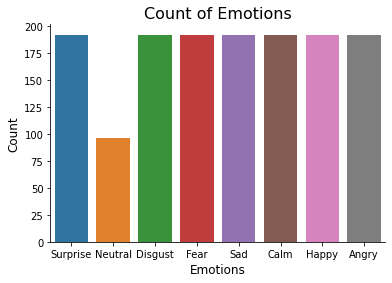

In [60]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [61]:
def waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

In [62]:
def spectrogram(data, sr, e):
    # stft is used to covert into fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    plt.colorbar()

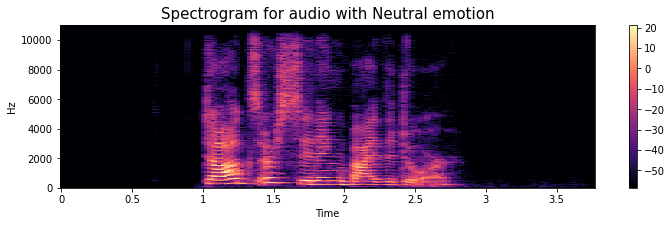

In [63]:
e='Neutral'
path = np.array(data_path.Path[data_path.Emotions==e])[1]
data, sampling_rate = librosa.load(path)
spectrogram(data, sampling_rate, e)
Audio(path)

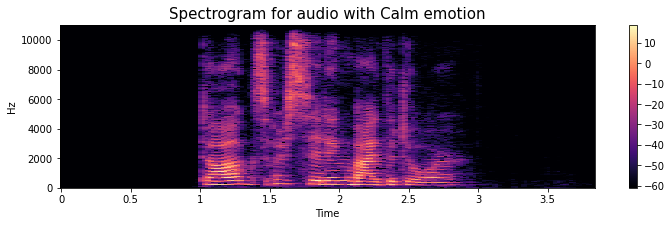

In [64]:
e='Calm'
path = np.array(data_path.Path[data_path.Emotions==e])[1]
data, sampling_rate = librosa.load(path)
spectrogram(data, sampling_rate, e)
Audio(path)

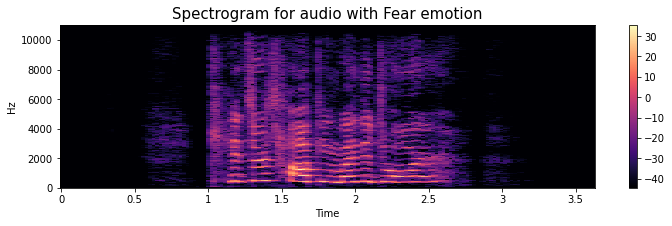

In [65]:
e='Fear'
path = np.array(data_path.Path[data_path.Emotions==e])[1]
data, sampling_rate = librosa.load(path)
spectrogram(data, sampling_rate, e)
Audio(path)

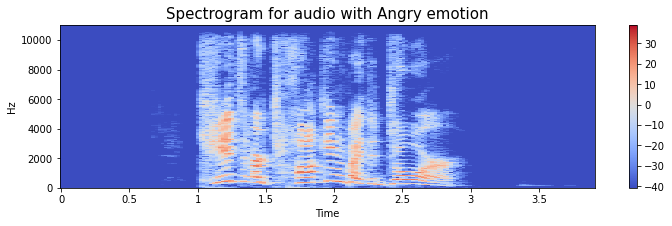

In [66]:
e='Angry'
path = np.array(data_path.Path[data_path.Emotions==e])[1]
data, sampling_rate = librosa.load(path)
spectrogram(data, sampling_rate, e)
Audio(path)

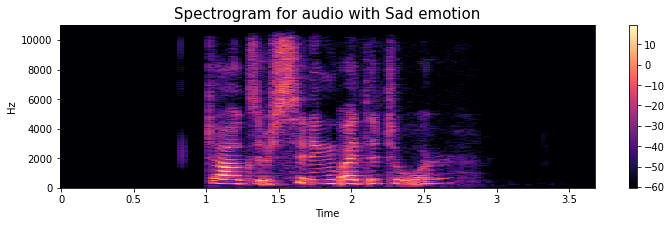

In [67]:
e='Sad'
path = np.array(data_path.Path[data_path.Emotions==e])[1]
data, sampling_rate = librosa.load(path)
spectrogram(data, sampling_rate, e)
Audio(path)

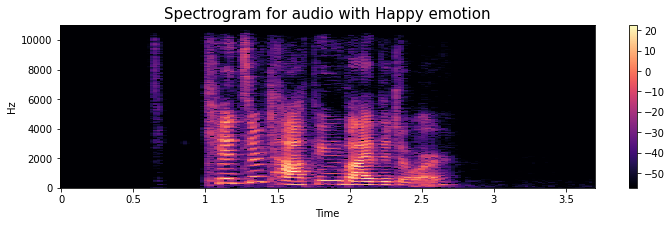

In [68]:
e='Happy'
path = np.array(data_path.Path[data_path.Emotions==e])[1]
data, sampling_rate = librosa.load(path)
spectrogram(data, sampling_rate, e)
Audio(path)

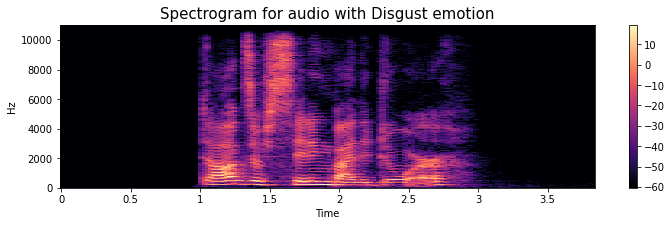

In [69]:
e='Disgust'
path = np.array(data_path.Path[data_path.Emotions==e])[2]
data, sampling_rate = librosa.load(path)
spectrogram(data, sampling_rate, e)
Audio(path)

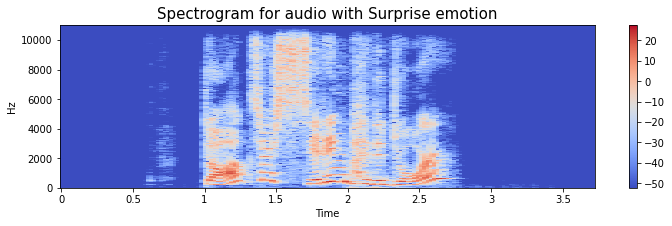

In [70]:
e='Surprise'
path = np.array(data_path.Path[data_path.Emotions==e])[1]
data, sampling_rate = librosa.load(path)
spectrogram(data, sampling_rate, e)
Audio(path)

Data Agumentation

<Figure size 1008x288 with 0 Axes>

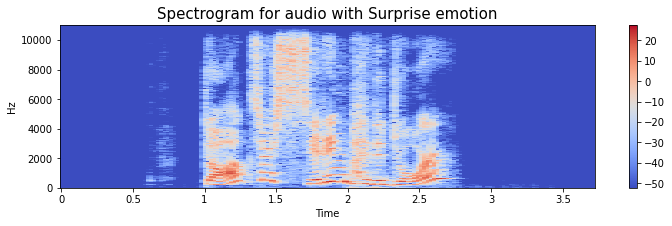

In [71]:
import librosa.display
plt.figure(figsize=(14,4))
spectrogram(data, sampling_rate, e)
Audio(path)

In [72]:
#Creating Noise function for data augumentation
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

#Creating stretch function for data augumentation
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

#Creating Shift function for data augumentation
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

#Creating pitch function for data augumentation
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

# Testing with sample
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

<Figure size 1008x288 with 0 Axes>

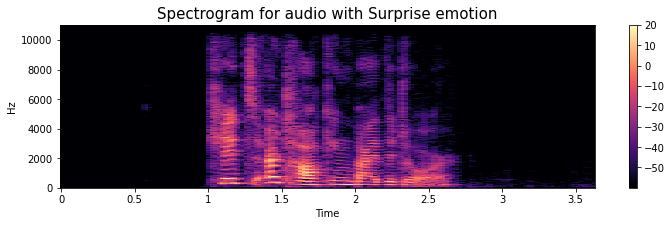

In [73]:
x = noise(data)
plt.figure(figsize=(14,4))
spectrogram(data, sampling_rate, e)
Audio(x, rate=sample_rate)

<Figure size 1008x288 with 0 Axes>

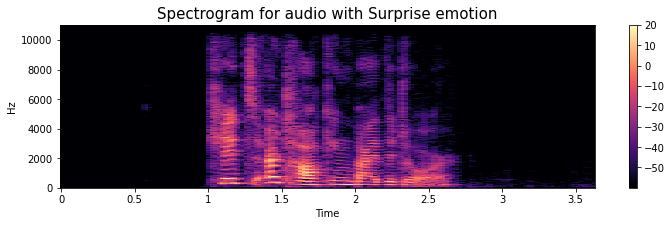

In [74]:
x = stretch(data)
plt.figure(figsize=(14,4))
spectrogram(data, sampling_rate, e)
Audio(x, rate=sample_rate)

<Figure size 1008x288 with 0 Axes>

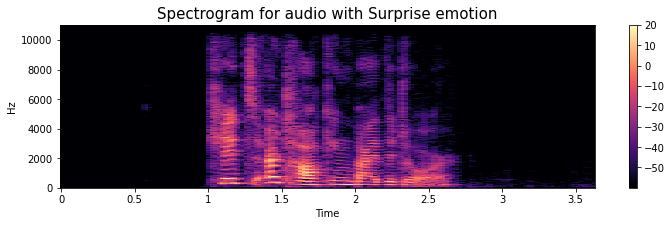

In [75]:
x = shift(data)
plt.figure(figsize=(14,4))
spectrogram(data, sampling_rate, e)
Audio(x, rate=sample_rate)

<Figure size 1008x288 with 0 Axes>

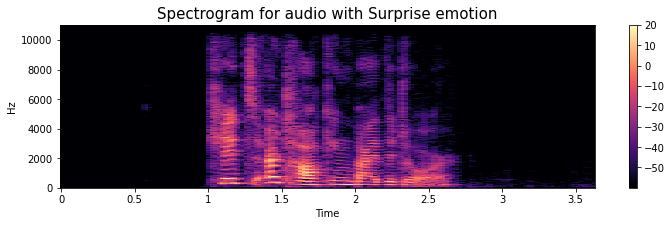

In [76]:
x = pitch(data, sample_rate)
plt.figure(figsize=(14,4))
spectrogram(data, sampling_rate, e)
Audio(x, rate=sample_rate)

Feature extraction


In [77]:
def extract_features(data):
    # The rate at which a signal goes from positive to zero to negative 
    # or from negative to zero to positive is called the zero-crossing rate (ZCR).
    
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) 

    # The chroma feature is a descriptor that gives a short version of the tonal content of an audio signal. 
    #Because of this, chroma features can be seen as important requirements for high-level semantic analysis,
    #like recognizing chords or figuring out how similar two chords are.
    
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft))

    # The mel-frequency cepstrum (MFC) is a representation of the short-term power spectrum of a sound that 
    #is based on the linear cosine transform of a log power spectrum on the nonlinear mel scale of frequency.
    
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) 

    # RMS, or root mean square, is a metric method used to determine the average volume level of an audio 
    #recording over the course of a time period of about 300 ms.
    
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms))

    # Frequencies over a cutoff are graphically represented logarithmically in a mel spectrogram
    #(the corner frequency). The spectrogram's vertical space between 1,000 and 2,000 Hz, for instance,
    #is proportionally smaller than the space between 2,000 and 4,000 Hz when the axes are linearly scaled.
    
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) 
    
    return result

def get_features(path):
    #  Duration and offset are used to make shure no audio before cetrain value and after certain value
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # features before augumentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # Data taken after augumented with noise
    
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    
    #the result is vertically stacked
    result = np.vstack((result, res2)) 
    
    # Data after streching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    
    #the result is vertically stacked
    result = np.vstack((result, res3)) 
    
    return result

In [78]:
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        Y.append(emotion)

In [79]:
len(X), len(Y), data_path.Path.shape

(4320, 4320, (1440,))

In [80]:
# Generating features data frame

Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()


0         1         2         3         4         5         6  \
0  0.231174  0.682377  0.670623  0.614065  0.563172  0.533576  0.632021   
1  0.332755  0.723431  0.739400  0.729126  0.721582  0.736259  0.738951   
2  0.181695  0.701749  0.670268  0.643930  0.542117  0.499561  0.619484   
3  0.239882  0.625256  0.583587  0.597744  0.604834  0.585755  0.600098   
4  0.281996  0.655799  0.653182  0.680349  0.730919  0.699379  0.665322   

          7         8         9  ...       153       154       155       156  \
0  0.667523  0.663989  0.670007  ...  0.000234  0.000235  0.000138  0.000127   
1  0.710533  0.686978  0.689497  ...  0.001391  0.001389  0.001291  0.001299   
2  0.694534  0.706868  0.679545  ...  0.000047  0.000049  0.000055  0.000047   
3  0.653401  0.701742  0.685137  ...  0.000018  0.000016  0.000013  0.000012   
4  0.670005  0.728804  0.718175  ...  0.000058  0.000053  0.000054  0.000051   

        157       158       159           160           161    labels  
0  0.000266  0.000227  0.000053  5.206115e-06  1.516035e-07  Surprise  
1  0.001346  0.001359  0.001221  1.169501e-03  1.188439e-03  Surprise  
2  0.000022  0.000027  0.000013  7.473878e-07  4.135930e-09  Surprise  
3  0.000006  0.000005  0.000002  1.253346e-07  4.100352e-09   Neutral  
4  0.000048  0.000045  0.000042  3.838708e-05  3.942841e-05   Neutral  

[5 rows x 163 columns]

Data Preperation

In [81]:
# Importing Libraries for Building Models

from sklearn.preprocessing import StandardScaler, OneHotEncoder,MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


In [82]:
# taking X and Y frames from featuress

X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [83]:
# We are usig onehotencoding our Y.

encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [84]:
# Data has been splitted into training and testing

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3240, 162), (3240, 8), (1080, 162), (1080, 8))

In [85]:
# Scaling is done using standard scalar

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3240, 162), (3240, 8), (1080, 162), (1080, 8))

In [86]:
# Model is beeing Compiled

x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3240, 162, 1), (3240, 8), (1080, 162, 1), (1080, 8))

In [87]:

#Cnn is built using these libraries

from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
#from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint


In [88]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 162, 256)          1536      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 81, 256)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 81, 256)           327936    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 41, 256)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 41, 128)           163968    
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 21, 128)           0         
_________________________________________________________________
dropout (Dropout)            (None, 21, 128)           0

2022-12-16 12:50:13.042365: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [89]:
Rlp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=70, validation_data=(x_test, y_test), callbacks=[Rlp])

Epoch 1/70


2022-12-16 12:50:13.291229: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


51/51 [==============================] - 9s 160ms/step - loss: 1.9759 - accuracy: 0.2191 - val_loss: 1.8774 - val_accuracy: 0.2583
Epoch 2/70
51/51 [==============================] - 9s 168ms/step - loss: 1.8825 - accuracy: 0.2611 - val_loss: 1.8048 - val_accuracy: 0.2991
Epoch 3/70
51/51 [==============================] - 8s 154ms/step - loss: 1.8082 - accuracy: 0.3167 - val_loss: 1.7840 - val_accuracy: 0.3000
Epoch 4/70
51/51 [==============================] - 8s 155ms/step - loss: 1.7424 - accuracy: 0.3312 - val_loss: 1.7002 - val_accuracy: 0.3213
Epoch 5/70
51/51 [==============================] - 8s 155ms/step - loss: 1.7044 - accuracy: 0.3417 - val_loss: 1.6125 - val_accuracy: 0.3667
Epoch 6/70
51/51 [==============================] - 8s 167ms/step - loss: 1.6319 - accuracy: 0.3744 - val_loss: 1.6019 - val_accuracy: 0.3796
Epoch 7/70
51/51 [==============================] - 8s 155ms/step - loss: 1.5932 - accuracy: 0.3910 - val_loss: 1.6727 - val_accuracy: 0.3435
Epoch 8/70
51/51 

34/34 [==============================] - 1s 21ms/step - loss: 1.6720 - accuracy: 0.6796
Accuracy of our model on test data :  67.96296238899231 %


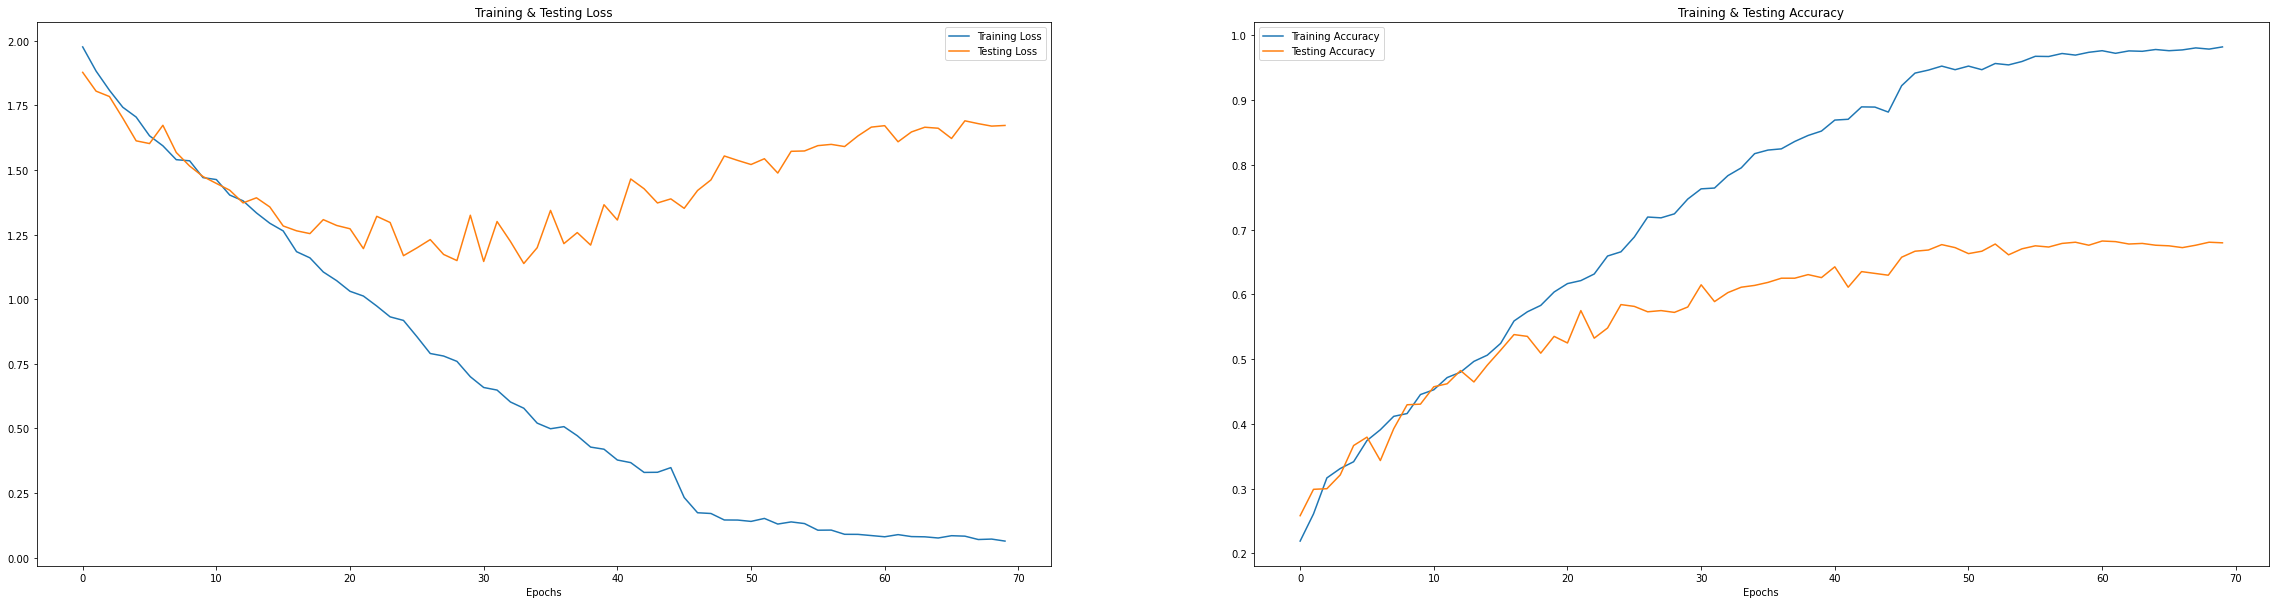

In [91]:
#Acccuracy after running 50 Epochs
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(70)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(40,10)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()


In [92]:
# Applying prediction on test data

pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

In [93]:
#generating a data frame to show predicted and actual values

df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

Predicted Labels Actual Labels
0             Fear          Fear
1          Neutral       Neutral
2              Sad           Sad
3          Neutral       Neutral
4             Fear          Fear
5            Angry         Angry
6             Fear          Fear
7             Fear          Fear
8          Disgust       Disgust
9             Calm          Calm

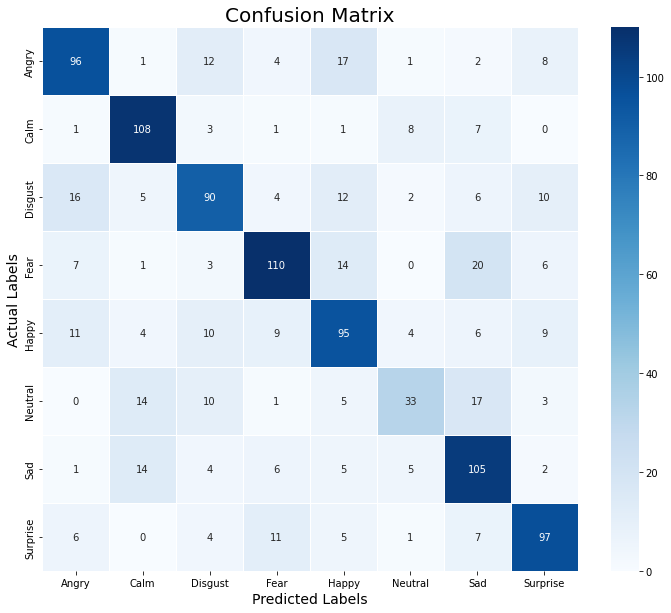

In [94]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [95]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Angry       0.70      0.68      0.69       141
        Calm       0.73      0.84      0.78       129
     Disgust       0.66      0.62      0.64       145
        Fear       0.75      0.68      0.72       161
       Happy       0.62      0.64      0.63       148
     Neutral       0.61      0.40      0.48        83
         Sad       0.62      0.74      0.67       142
    Surprise       0.72      0.74      0.73       131

    accuracy                           0.68      1080
   macro avg       0.68      0.67      0.67      1080
weighted avg       0.68      0.68      0.68      1080

